In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [3]:
df = pd.read_excel('Startup_Funding.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1941 non-null   datetime64[ns]
 1   Startup Name       1941 non-null   object        
 2   Industry Vertical  1941 non-null   object        
 3   Sub Vertical       1941 non-null   object        
 4   Location           1941 non-null   object        
 5   Investors          1941 non-null   object        
 6   Investment Type    1941 non-null   object        
 7   Amount             1941 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 121.4+ KB


In [5]:
df.head()

,Date,Startup Name,Industry Vertical,Sub Vertical,Location,Investors,Investment Type,Amount
0,2020-01-09,Byju’S,Ed-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity,200000000
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394
2,2020-01-09,Mamaearth,E-Commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860
3,2020-01-02,Wealthbucket,Fintech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series A,3000000
4,2020-01-02,Fashor,Fashion And Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000


In [6]:
df.describe()

,Amount
count,1.941000e+03
mean,1.901700e+07
std,1.250727e+08
min,1.800000e+04
25%,5.000000e+05
50%,1.800000e+06
75%,8.000000e+06
max,3.900000e+09


# Get A List Of Startups Having Industry Vertical As "E-Commerce" Situated In Location "Bengaluru" With Funding Of  "10M" and Above.

In [7]:
df[(df['Industry Vertical'] == "E-Commerce")&(df['Location']=="Bengaluru")&(df['Amount']>10000000)]['Startup Name']

2         Mamaearth
12          Licious
47           Meesho
71         Nobroker
91         Glowroad
94          Medlife
104        Krazybee
284    Urban Ladder
337           Udaan
Name: Startup Name, dtype: object

# Show The Average Funding For Industry Vertical "ED-Tech" For The year 2019

In [8]:
dfyear = df[df['Date'].dt.year == 2019]
dfyear[dfyear['Industry Vertical']=='Ed-Tech']['Amount'].mean()

51349632.14285714

# Get A List Of Investors For The Startup "Zomato"

In [9]:
df[df['Startup Name']=='Zomato']['Investors']

6             Ant Financial
313          Ant Financials
1605    Temasek, Vy Capital
1904      Info Edge (India)
Name: Investors, dtype: object

# What Is The Most Common Investment Type ?

In [10]:
df['Investment Type'].value_counts().head(1)

Private Equity    1009
Name: Investment Type, dtype: int64

# Track The Funding Of The Startup "Unacademy" Over The Years 

In [11]:
import cufflinks as cf 
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [12]:
dfun = df[df['Startup Name']=='Unacademy']
dfun.iplot(kind='bar',x='Date',y='Amount')

# Comapre The Average Funding For Investment Types Series A, SeriesB, Series C, Series D

In [13]:
dfserA = df[df['Investment Type']=='Series A']['Amount'].mean()
dfserB = df[df['Investment Type']=='Series B']['Amount'].mean()
dfserC = df[df['Investment Type']=='Series C']['Amount'].mean()
dfserD = df[df['Investment Type']=='Series D']['Amount'].mean()
SeriesData = [dfserA,dfserB,dfserC,dfserD]
Serieslabels = 'SeriesA SeriesB SeriesC SeriesD'.split()
Series = pd.DataFrame(data=SeriesData,index=Serieslabels)
Series.index.names=['Series']

<AxesSubplot:xlabel='Series'>

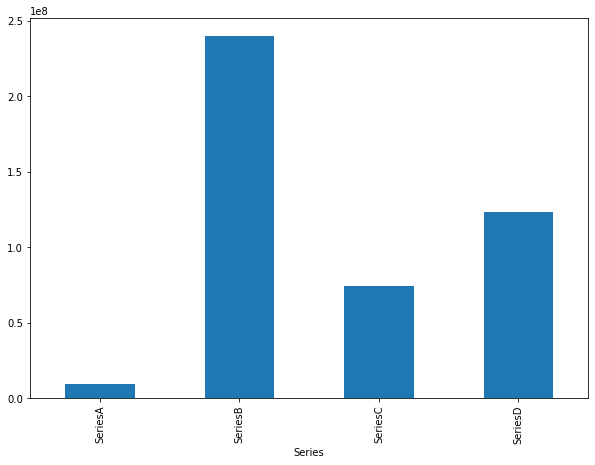

In [14]:
Series.plot.bar(figsize=(10,7),legend=False)

# Get A List OF Startups Names With Funding OF "1B" And Above 

In [15]:
df[df['Amount']>=1000000000]['Startup Name'].unique()

array(['Paytm', 'Rapido Bike Taxi', 'Flipkart'], dtype=object)

# Get All The Available Data For Startup "Meesho" 

In [17]:
df[df['Startup Name']=='Meesho']

,Date,Startup Name,Industry Vertical,Sub Vertical,Location,Investors,Investment Type,Amount
47,2019-08-12,Meesho,E-Commerce,Social Commerce,Bengaluru,Naspers,Series D,125000000
122,2018-11-06,Meesho,Ecommerce,Social Commerce,Bengaluru,"Shunwei Capital, DST Partners and RPS Ventures",Series C,50000000
213,2018-06-07,Meesho,Consumer Internet,Online Marketplace For Resellers,Bengaluru,"Sequoia Capital India, SAIF Partners, Y Combin...",Private Equity,11500000
459,2017-10-11,Meesho,Ecommerce,Online Reseller Network,Bengaluru,"SAIF Partners, YCombinator, Venture Highway",Private Equity,3100000


# Show The Total Yearly Funding For The Startup "Nykaa"

In [18]:
dfNykaa = df[df['Startup Name']=='Nykaa']
pd.pivot_table(dfNykaa,index='Date',aggfunc='sum')

,Amount
Date,
2015-10-03,9500000
2016-09-12,12300000
2018-04-22,11000000
2018-05-14,24000000
2018-09-05,157200000


# What Was The Highest One Time Funding

In [30]:
df[df['Amount']==df['Amount'].max()]

,Date,Startup Name,Industry Vertical,Sub Vertical,Location,Investors,Investment Type,Amount
57,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3900000000


# What Was The Lowest One Time Funding 

In [31]:
df[df['Amount']==df['Amount'].min()]

,Date,Startup Name,Industry Vertical,Sub Vertical,Location,Investors,Investment Type,Amount
831,2017-01-30,Maptags,Consumer Internet,Smart Online address tags,Bengaluru,The Ten Minute Million,Seed Funding,18000
